# LAB 7 KNN

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 15, 5
sns.set_style('darkgrid')

In [3]:
diabetes_df = pd.read_csv('diabetes.csv')
diabetes_df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [4]:
# Personal Practice 1
diabetes_df.head(n = 11)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0             6      148             72             35        0  33.6   
1             1       85             66             29        0  26.6   
2             8      183             64              0        0  23.3   
3             1       89             66             23       94  28.1   
4             0      137             40             35      168  43.1   
5             5      116             74              0        0  25.6   
6             3       78             50             32       88  31.0   
7            10      115              0              0        0  35.3   
8             2      197             70             45      543  30.5   
9             8      125             96              0        0   0.0   
10            4      110             92              0        0  37.6   

    DiabetesPedigreeFunction  Age  Outcome  
0                      0.627   50        1  
1                      0.351   31        0  
2                      0.672   32        1  
3                      0.167   21        0  
4                      2.288   33        1  
5                      0.201   30        0  
6                      0.248   26        1  
7                      0.134   29        0  
8                      0.158   53        1  
9                      0.232   54        1  
10                     0.191   30        0

In [5]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
# Personal Practice 2
diabetes_df.info(verbose = False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Columns: 9 entries, Pregnancies to Outcome
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
diabetes_df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [8]:
# Personal Practice 3
diabetes_df.describe(percentiles = [.30, .60, .90])

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
30%       1.000000  102.000000      64.000000       8.200000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
60%       4.000000  125.000000      74.000000      27.000000   72.200000   
90%       9.000000  167.000000      88.000000      40.000000  210.000000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
30%     28.200000                  0.259000   25.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
60%     33.700000                  0.454200   33.000000    0.000000  
90%     41.500000                  0.878600   51.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [9]:
diabetes_df_copy = diabetes_df.copy(deep=True)
diabetes_df_copy['Glucose'] = diabetes_df_copy['Glucose'].replace(0,np.NaN)
diabetes_df_copy['BloodPressure'] = diabetes_df_copy['BloodPressure'].replace(0,np.NaN)
diabetes_df_copy['SkinThickness'] = diabetes_df_copy['SkinThickness'].replace(0,np.NaN)
diabetes_df_copy['Insulin'] = diabetes_df_copy['Insulin'].replace(0,np.NaN)
diabetes_df_copy['BMI'] = diabetes_df_copy['BMI'].replace(0,np.NaN)

In [10]:
# Personal Practice 4
diabetes_df_copy1 = diabetes_df.copy(deep=False)
diabetes_df_copy1['Glucose'] = diabetes_df_copy1['Glucose'].replace(0,15)
diabetes_df_copy1['BloodPressure'] = diabetes_df_copy1['BloodPressure'].replace(0,15)
diabetes_df_copy1['SkinThickness'] = diabetes_df_copy1['SkinThickness'].replace(0,15)
diabetes_df_copy1['Insulin'] = diabetes_df_copy1['Insulin'].replace(0,15)
diabetes_df_copy1['BMI'] = diabetes_df_copy1['BMI'].replace(0,15)
diabetes_df_copy1.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.992188      69.789062      24.970052   87.104167   
std       3.369578   31.623765      17.024786      10.910703  110.318288   
min       0.000000   15.000000      15.000000       7.000000   14.000000   
25%       1.000000   99.000000      62.000000      15.000000   15.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    32.207422                  0.471876   33.240885    0.348958  
std      7.181636                  0.331329   11.760232    0.476951  
min     15.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

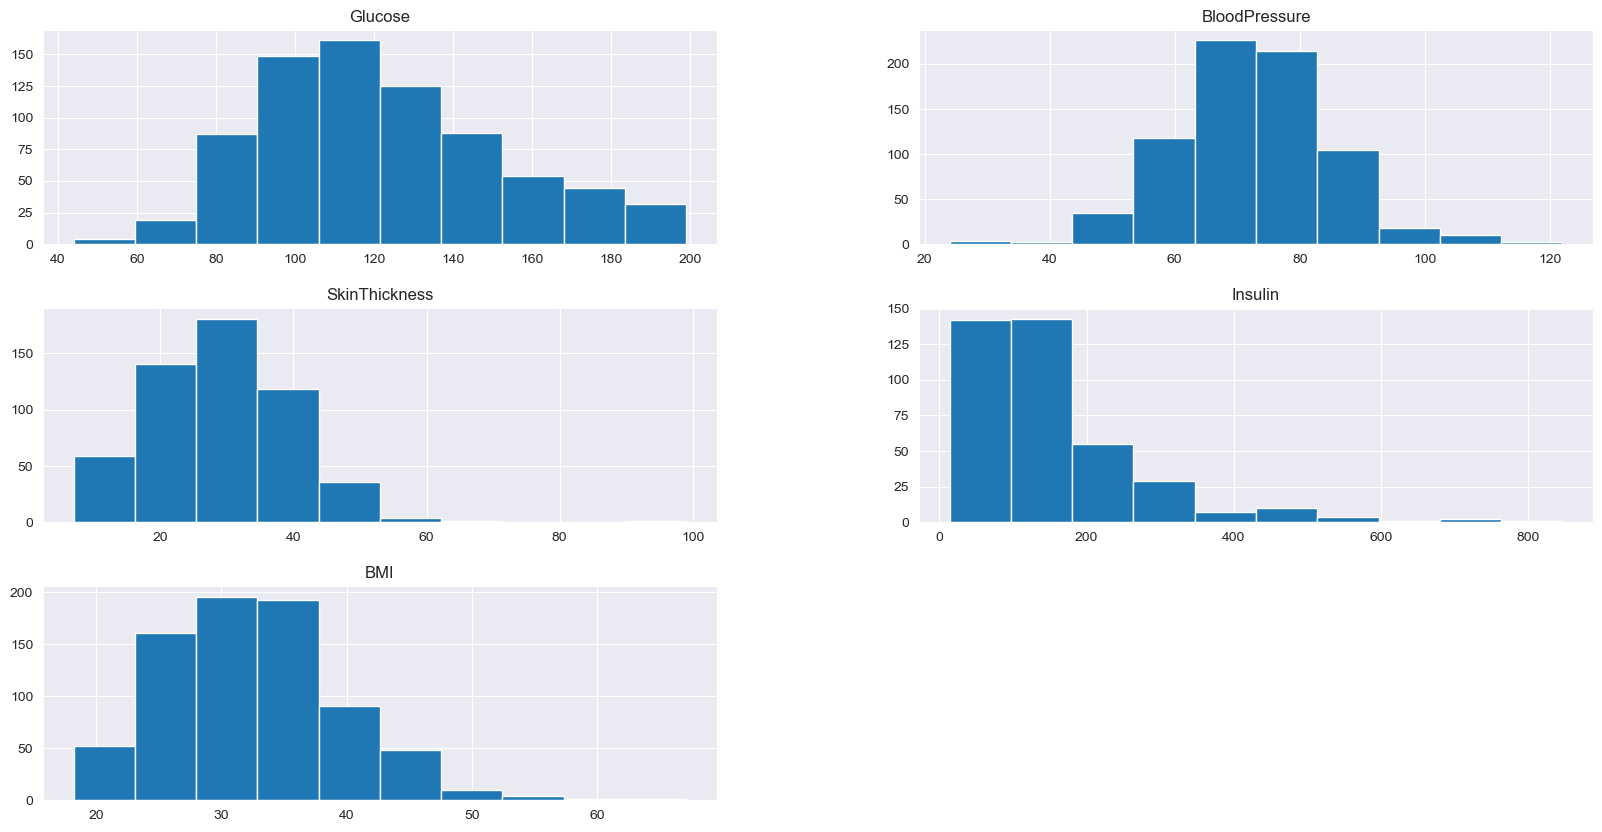

In [11]:
diabetes_df_copy[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].hist(figsize = (20,10))
plt.show()

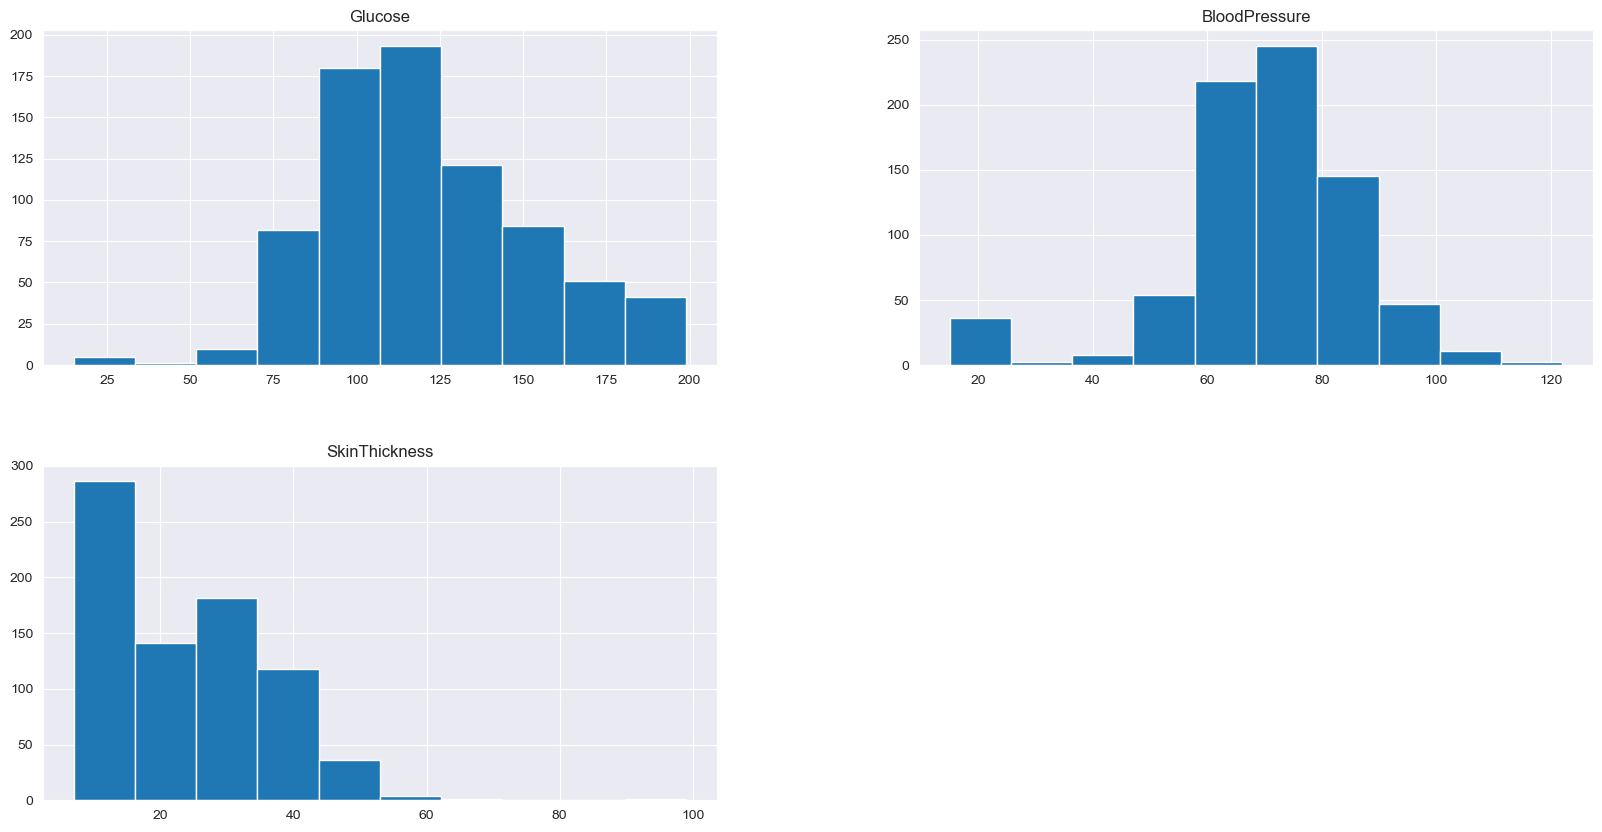

In [12]:
# Personal Practice 5
diabetes_df_copy1[['Glucose', 'BloodPressure', 'SkinThickness']].hist(figsize = (20,10))
plt.show()

In [13]:
diabetes_df_copy['Glucose'].fillna(diabetes_df_copy['Glucose'].mean(), inplace = True)
diabetes_df_copy['BloodPressure'].fillna(diabetes_df_copy['BloodPressure'].mean(), inplace = True)
diabetes_df_copy['SkinThickness'].fillna(diabetes_df_copy['SkinThickness'].median(), inplace = True)
diabetes_df_copy['Insulin'].fillna(diabetes_df_copy['Insulin'].median(), inplace = True)
diabetes_df_copy['BMI'].fillna(diabetes_df_copy['BMI'].median(), inplace = True)

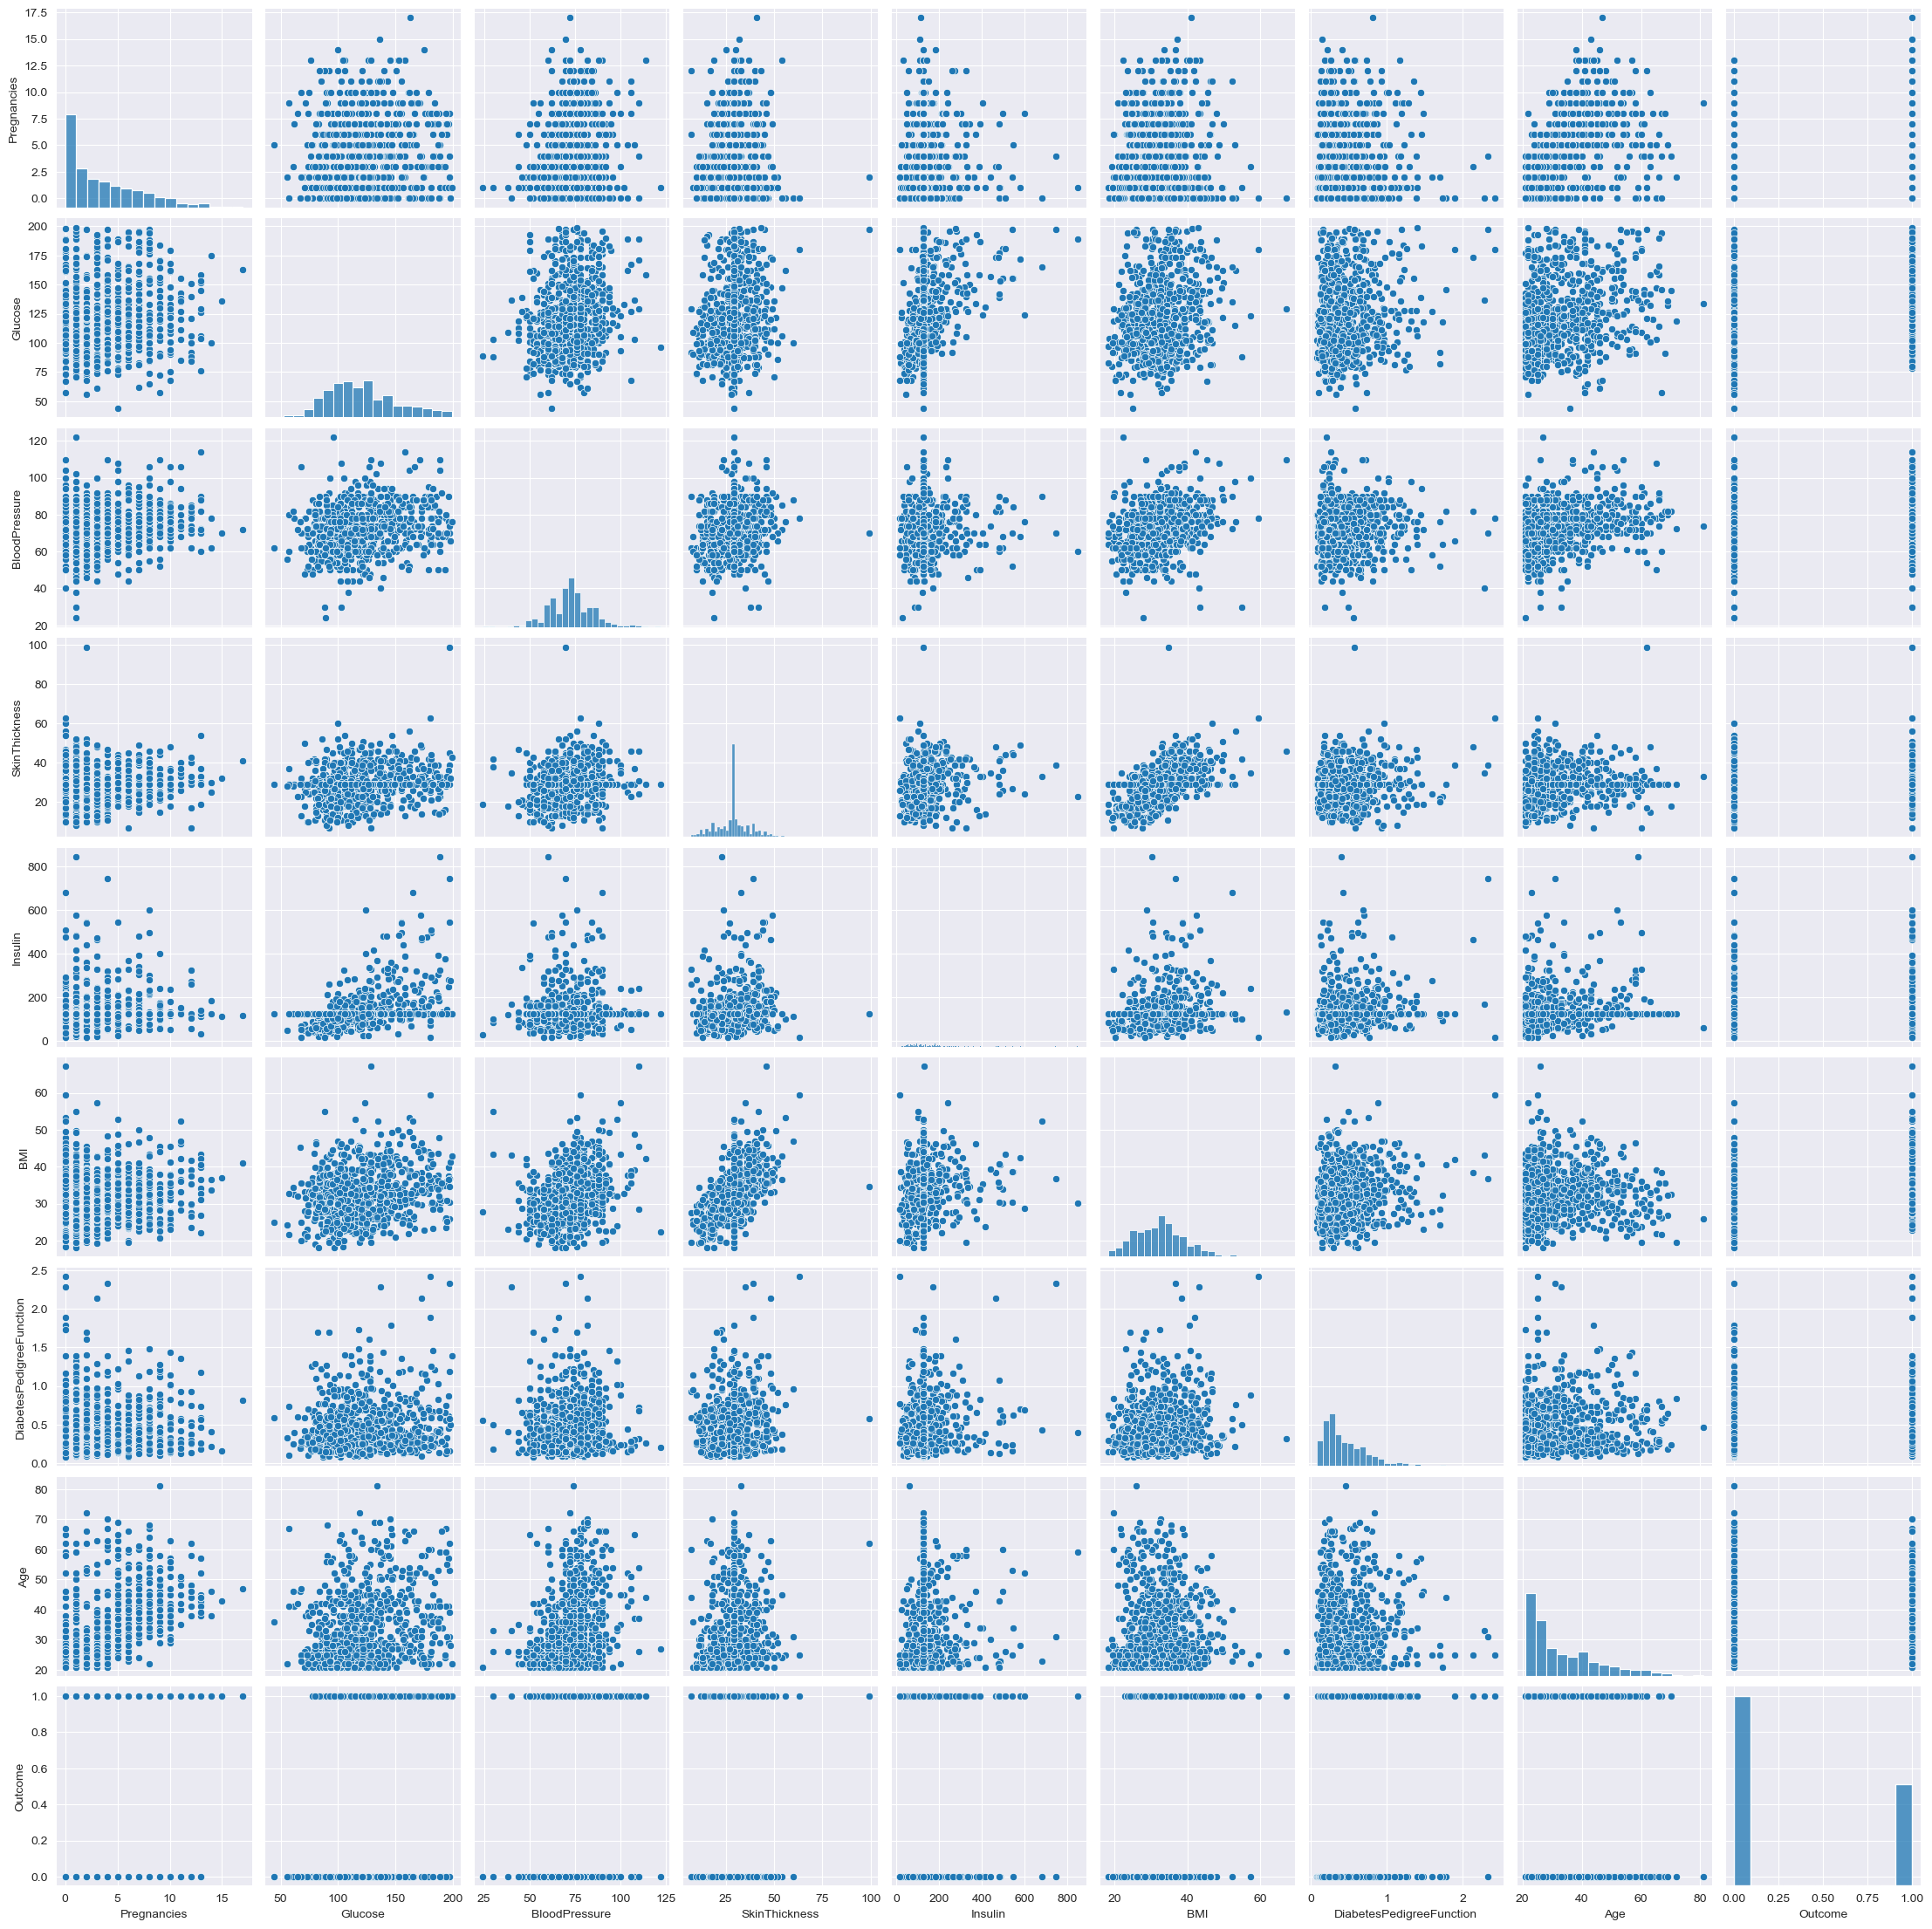

In [14]:
# Personal Practice 6
sns.pairplot(diabetes_df_copy)
plt.show()

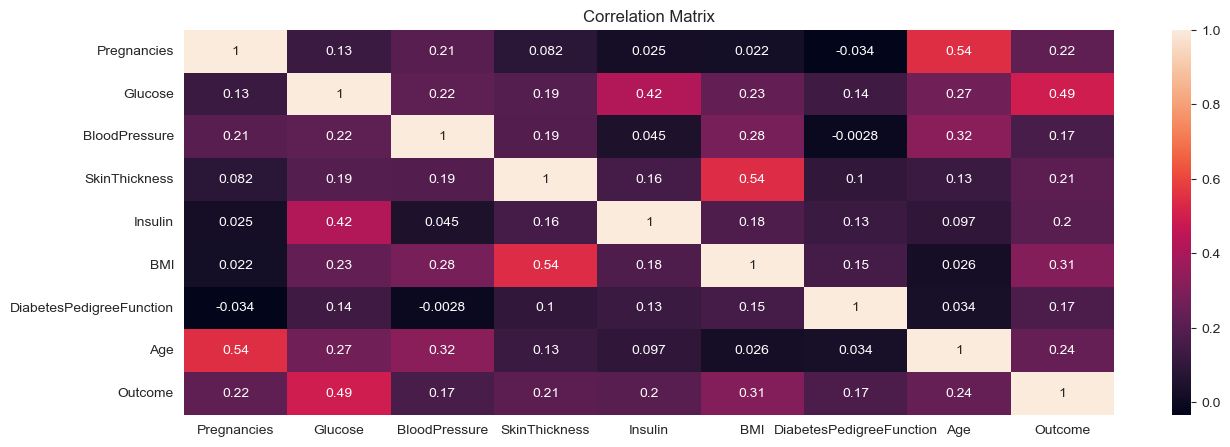

In [15]:
sns.heatmap(diabetes_df_copy.corr(), annot=True)
plt.title('Correlation Matrix')
plt.show()

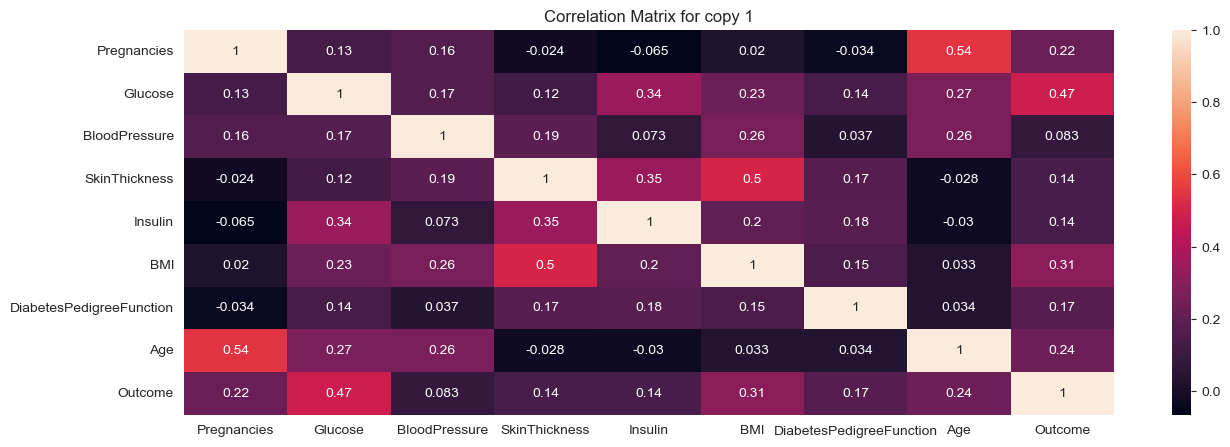

In [16]:
# Personal Practice 7
diabetes_df_copy1['Glucose'].fillna(diabetes_df_copy1['Glucose'].mean(), inplace = True)
diabetes_df_copy1['BloodPressure'].fillna(diabetes_df_copy1['BloodPressure'].mean(), inplace = True)
diabetes_df_copy1['SkinThickness'].fillna(diabetes_df_copy1['SkinThickness'].median(), inplace = True)
diabetes_df_copy1['Insulin'].fillna(diabetes_df_copy1['Insulin'].median(), inplace = True)
diabetes_df_copy1['BMI'].fillna(diabetes_df_copy1['BMI'].median(), inplace = True)
sns.heatmap(diabetes_df_copy1.corr(), annot=True)
plt.title('Correlation Matrix for copy 1')
plt.show()

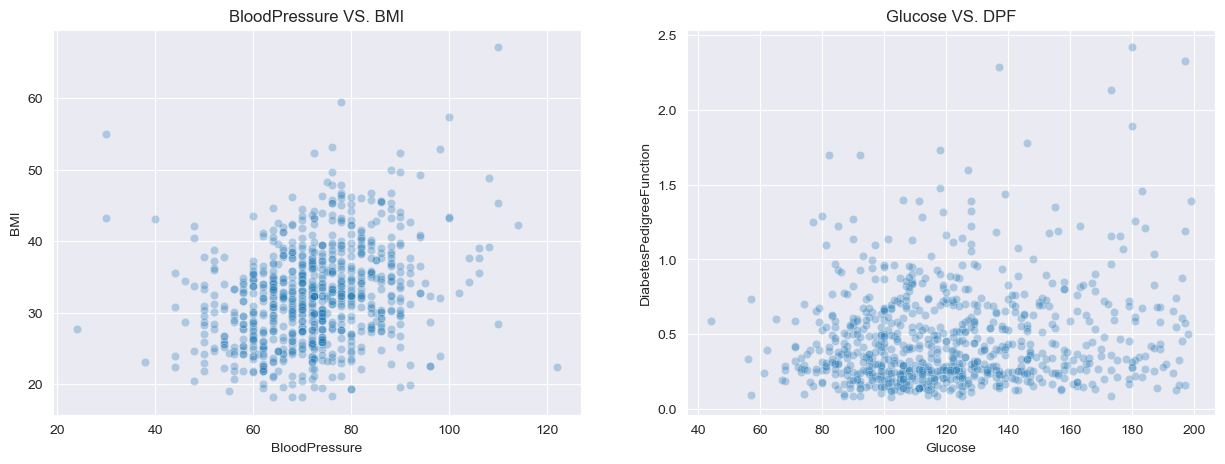

In [17]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
# alpha parameter adjusts the point transparency. points with much more overlap will appear darker.
sns.scatterplot(x='BloodPressure', y='BMI', data=diabetes_df_copy, alpha=0.3, ax=axes[0])
axes[0].set_title('BloodPressure VS. BMI')
sns.scatterplot(x='Glucose', y='DiabetesPedigreeFunction', data=diabetes_df_copy, alpha=0.3, ax=axes[1])
axes[1].set_title('Glucose VS. DPF')
plt.show()

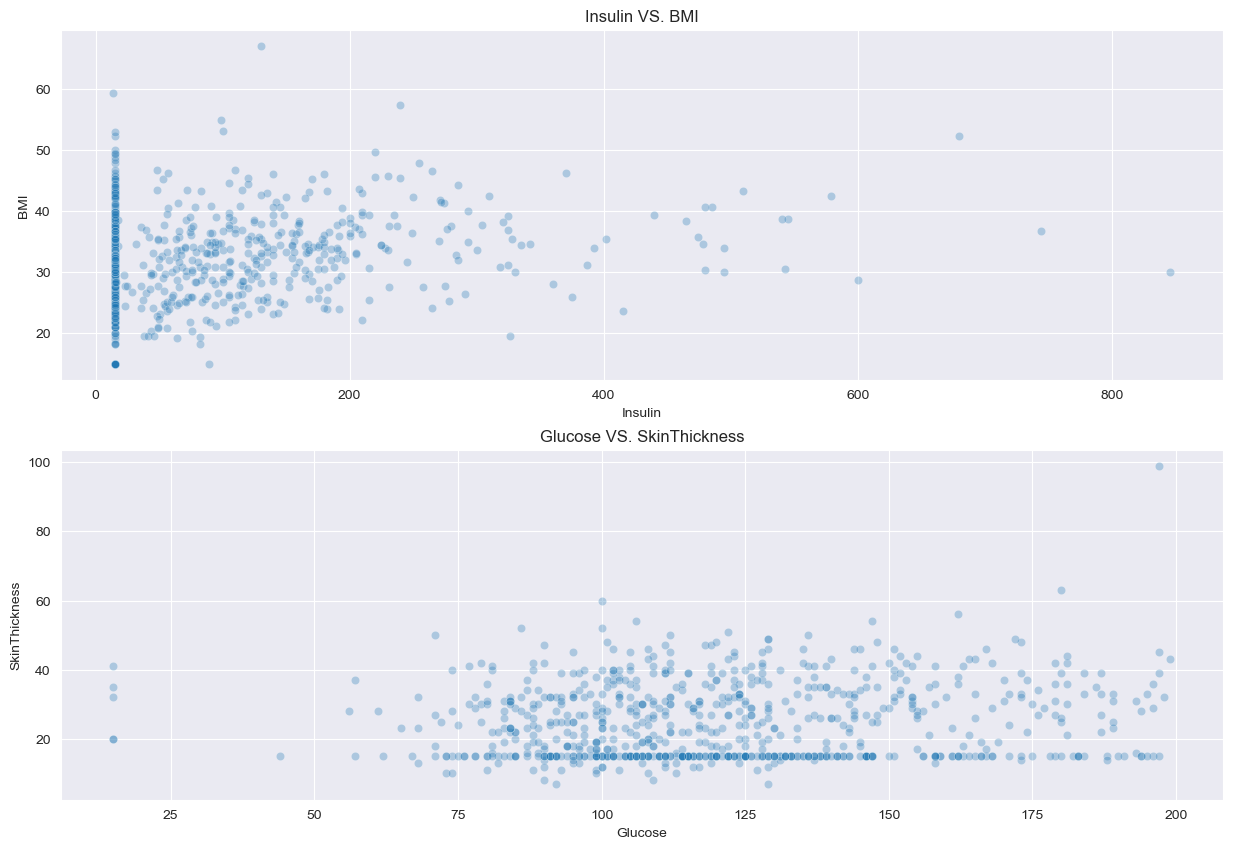

In [18]:
# Personal Practice 8
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 10))
sns.scatterplot(x='Insulin', y='BMI', data=diabetes_df_copy1, alpha=0.3, ax = axes[0])
axes[0].set_title('Insulin VS. BMI')
sns.scatterplot(x='Glucose', y='SkinThickness', data=diabetes_df_copy1, alpha=0.3, ax=axes[1])
axes[1].set_title('Glucose VS. SkinThickness')
plt.show()

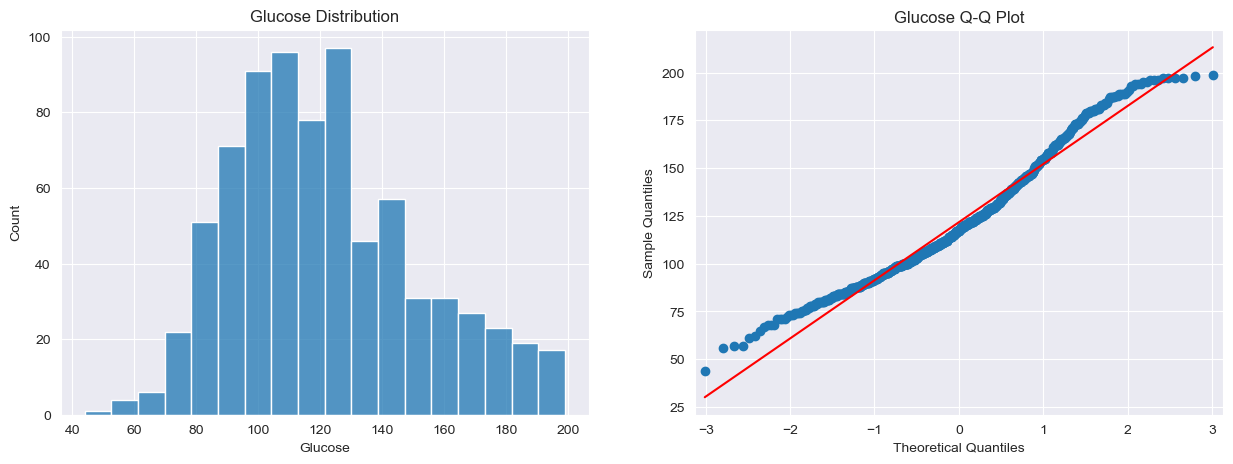

Shapiro-Wilk: 
w:0.9699020385742188, p-value:1.7770054525079182e-11

Kolmogorov-Smirnov: 
d:0.9699020385742188, p-value:0.0

Skewness of the data: 
0.531677628850459



In [19]:
import statsmodels.api as sm
import scipy
import pylab

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
sns.histplot(diabetes_df_copy['Glucose'], ax=axes[0])
axes[0].set_title('Glucose Distribution')
sm.qqplot(diabetes_df_copy['Glucose'], line='s', ax=axes[1])
axes[1].set_title('Glucose Q-Q Plot')
pylab.show()
w, p_val = scipy.stats.shapiro(diabetes_df_copy['Glucose'])
print('Shapiro-Wilk: \nw:{}, p-value:{}\n'.format(w,p_val))
d, p_val = scipy.stats.kstest(diabetes_df_copy['Glucose'], 'norm')
print('Kolmogorov-Smirnov: \nd:{}, p-value:{}\n'.format(w,p_val))
print('Skewness of the data: \n{}\n'.format(scipy.stats.skew(diabetes_df_copy['Glucose'])))

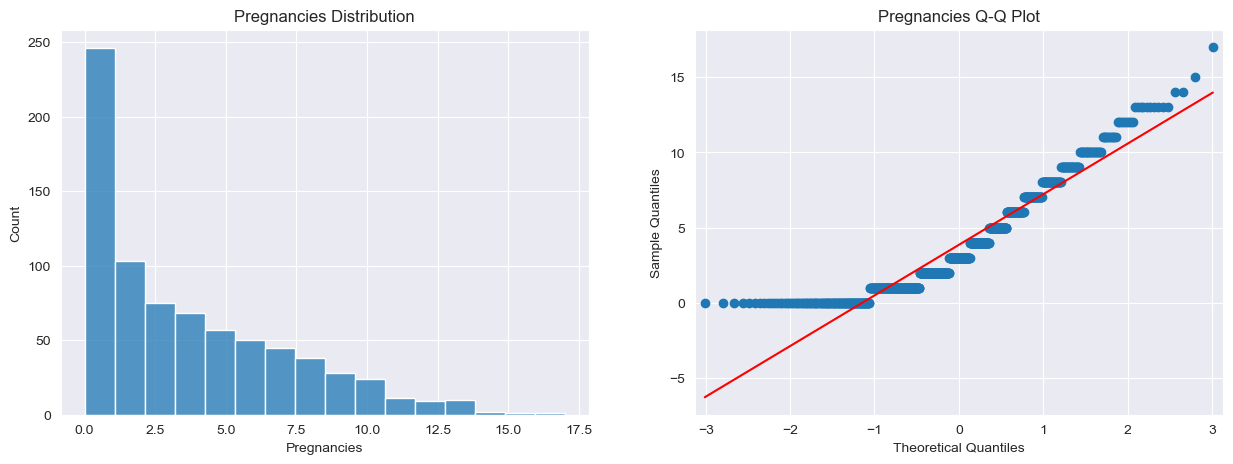

In [20]:
# Personal Practice 9
fig, axes1 = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
sns.histplot(diabetes_df_copy['Pregnancies'], ax=axes1[0])
axes1[0].set_title('Pregnancies Distribution')
sm.qqplot(diabetes_df_copy['Pregnancies'], line='s', ax=axes1[1])
axes1[1].set_title('Pregnancies Q-Q Plot')
pylab.show()

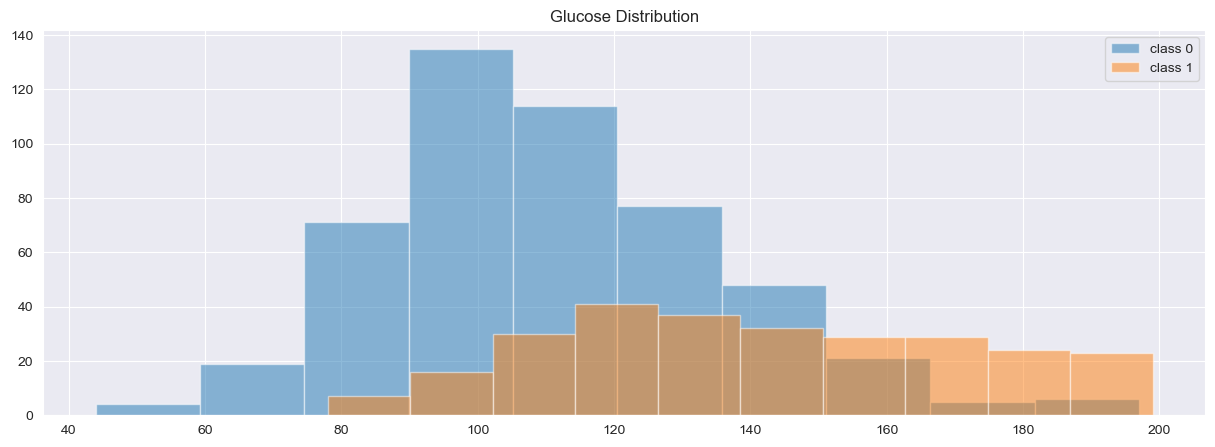

In [21]:
class_zero = diabetes_df_copy[(diabetes_df_copy['Outcome'] == 0)]
class_one = diabetes_df_copy[(diabetes_df_copy['Outcome'] == 1)]
plt.hist(x=class_zero['Glucose'], label='class 0', alpha=0.5)
plt.hist(x=class_one['Glucose'], label='class 1', alpha=0.5)
plt.legend()
plt.title('Glucose Distribution')
plt.show()

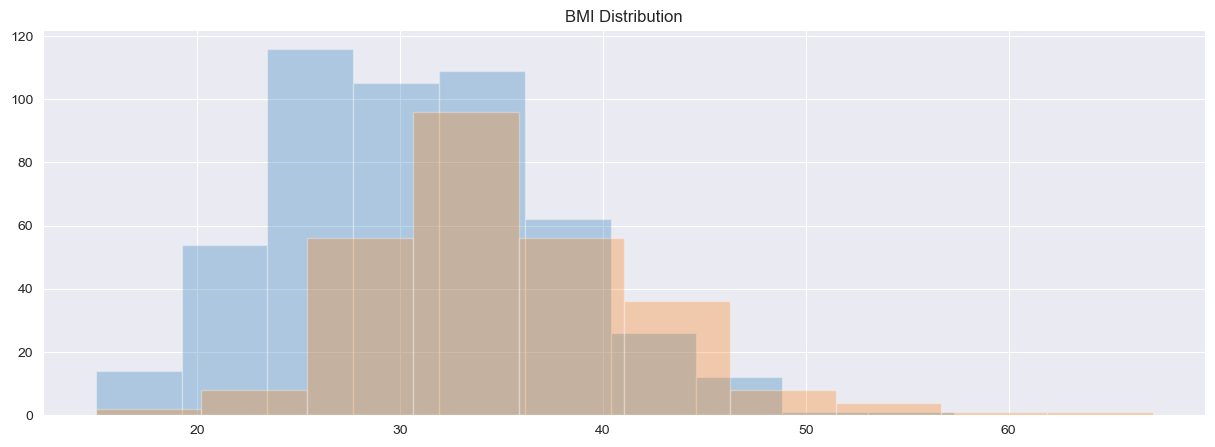

In [22]:
# Personal Practice 10
class_1 = diabetes_df_copy1[diabetes_df_copy1['Outcome'] == 0]
class_2 = diabetes_df_copy1[diabetes_df_copy1['Outcome'] == 1]
plt.hist(x = class_1['BMI'], label = 'class_1', alpha = .3)
plt.hist(x = class_2['BMI'], label = 'class_2', alpha = .3)
plt.title('BMI Distribution')
plt.show()

In [23]:
from sklearn.preprocessing import StandardScaler

X = diabetes_df_copy.drop('Outcome', axis = 1)
y = diabetes_df_copy['Outcome']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X = pd.DataFrame(data=X_scaled, columns=X.columns)

In [24]:
# Personal Practice 11
from sklearn.preprocessing import StandardScaler

X1 = diabetes_df_copy1.drop('BMI', axis = 1)
y1 = diabetes_df_copy1['BMI']
scaler1 = StandardScaler()
X_scaled1 = scaler.fit_transform(X)
X1 = pd.DataFrame(data=X_scaled1, columns=X1.columns)

In [25]:
X.head()

Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.639947  0.865108      -0.033518       0.670643 -0.181541  0.166619   
1    -0.844885 -1.206162      -0.529859      -0.012301 -0.181541 -0.852200   
2     1.233880  2.015813      -0.695306      -0.012301 -0.181541 -1.332500   
3    -0.844885 -1.074652      -0.529859      -0.695245 -0.540642 -0.633881   
4    -1.141852  0.503458      -2.680669       0.670643  0.316566  1.549303   

   DiabetesPedigreeFunction       Age  
0                  0.468492  1.425995  
1                 -0.365061 -0.190672  
2                  0.604397 -0.105584  
3                 -0.920763 -1.041549  
4                  5.484909 -0.020496

In [26]:
# Personal Practice 12
X1.head()

Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin  \
0     0.639947  0.865108      -0.033518       0.670643 -0.181541   
1    -0.844885 -1.206162      -0.529859      -0.012301 -0.181541   
2     1.233880  2.015813      -0.695306      -0.012301 -0.181541   
3    -0.844885 -1.074652      -0.529859      -0.695245 -0.540642   
4    -1.141852  0.503458      -2.680669       0.670643  0.316566   

   DiabetesPedigreeFunction       Age   Outcome  
0                  0.166619  0.468492  1.425995  
1                 -0.852200 -0.365061 -0.190672  
2                 -1.332500  0.604397 -0.105584  
3                 -0.633881 -0.920763 -1.041549  
4                  1.549303  5.484909 -0.020496

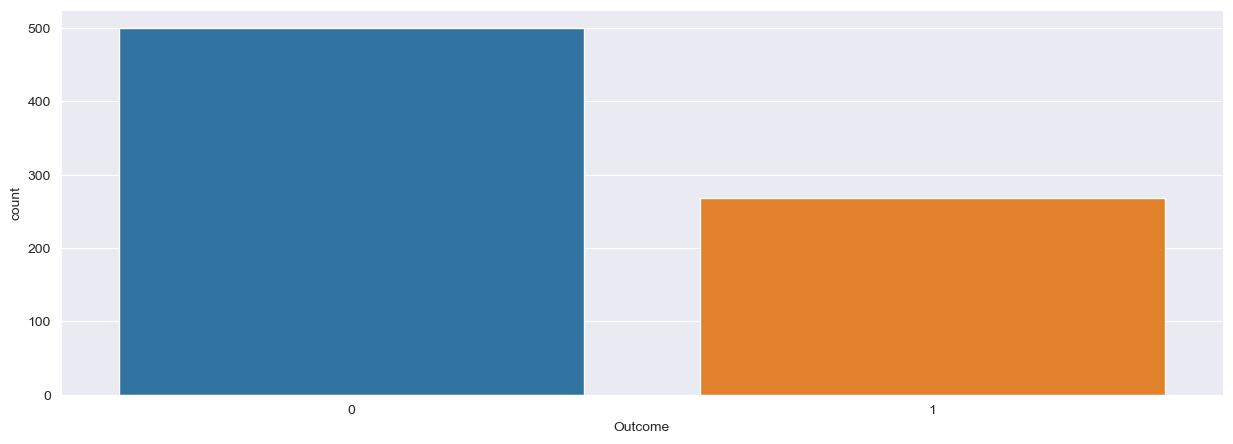

In [27]:
sns.countplot(x=diabetes_df_copy['Outcome'])
plt.show()

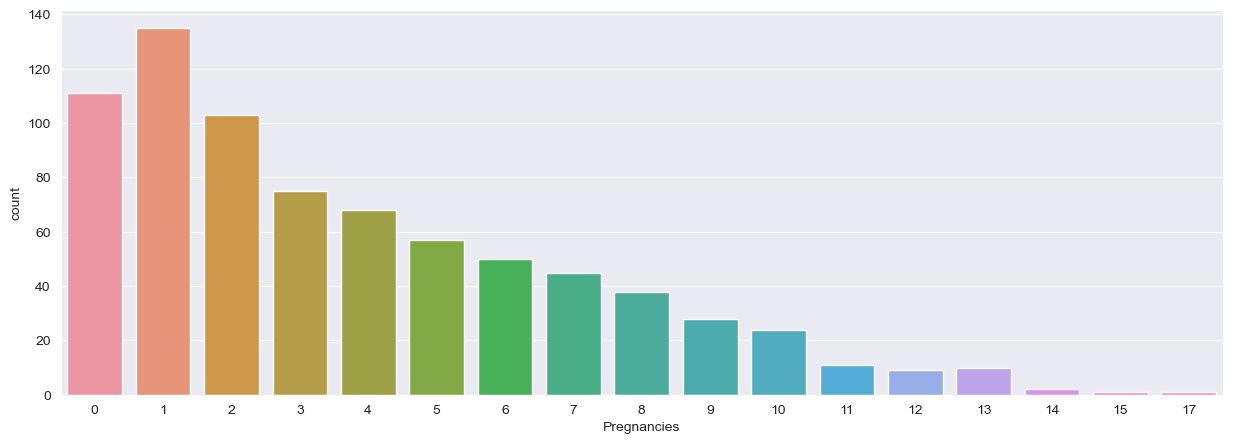

In [28]:
# Personal Practice 13
sns.countplot(x = diabetes_df_copy1['Pregnancies'])
plt.show()

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

In [30]:
# Personal Practice 14
from sklearn.model_selection import train_test_split

X1_train, X1_test, y1_train, y1_test = train_test_split(X, y, test_size=0.65, random_state=42)

In [31]:
from sklearn.neighbors import KNeighborsClassifier

test_scores = []
train_scores = []
for i in range(1,15):
    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train) 
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

In [32]:
# Personal Practice 15
from sklearn.neighbors import KNeighborsClassifier

test_scores1 = []
train_scores1 = []
for i in range(1,15):
    knn1 = KNeighborsClassifier(i)
    knn1.fit(X1_train,y1_train) 
    train_scores1.append(knn1.score(X1_train,y1_train))
    test_scores1.append(knn1.score(X1_test,y1_test))

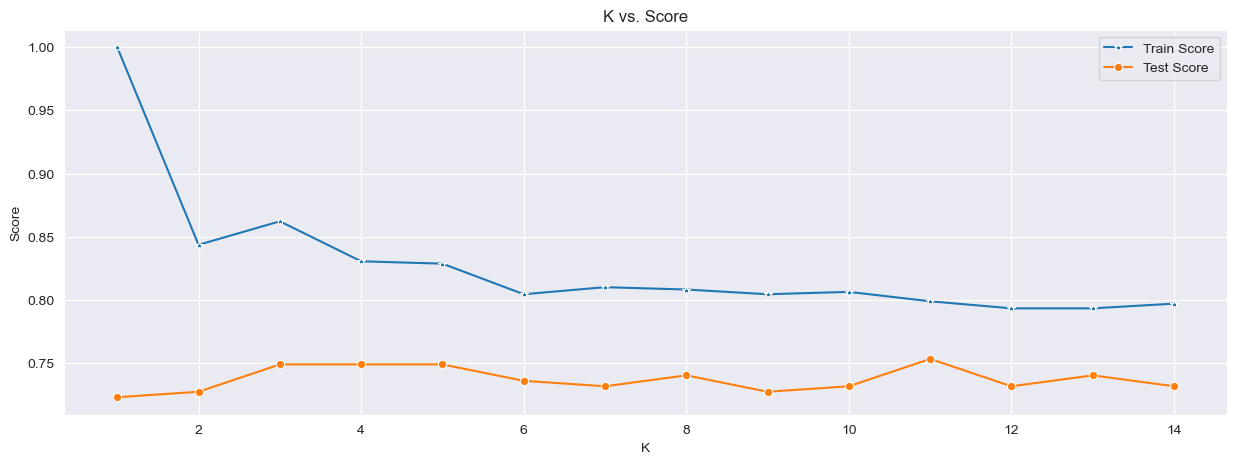

In [33]:
sns.lineplot(x=range(1,15), y=train_scores, marker='*', label='Train Score')
sns.lineplot(x=range(1,15), y=test_scores, marker='o', label='Test Score')
plt.title('K vs. Score')
plt.xlabel('K')
plt.ylabel('Score')
plt.show()

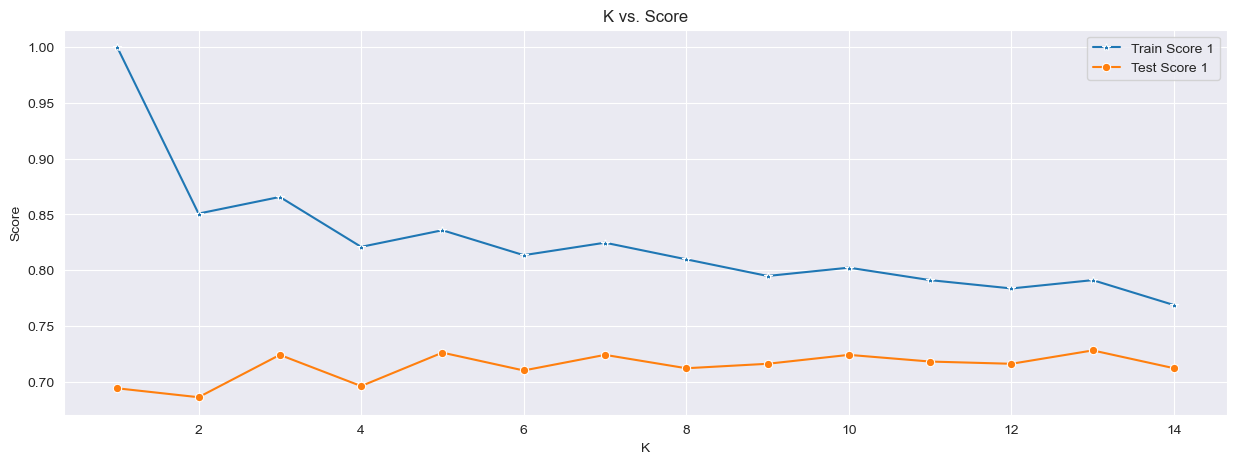

In [34]:
# Personal Practice 16
from sklearn.neighbors import KNeighborsClassifier

sns.lineplot(x=range(1,15), y=train_scores1, marker='*', label='Train Score 1')
sns.lineplot(x=range(1,15), y=test_scores1, marker='o', label='Test Score 1')
plt.title('K vs. Score')
plt.xlabel('K')
plt.ylabel('Score')
plt.show()

In [35]:
knn = KNeighborsClassifier(11)

knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.7532467532467533

In [36]:
# Personal Practice 17
knn1 = KNeighborsClassifier(43)

knn1.fit(X1_train,y1_train)
knn1.score(X1_test,y1_test)

0.754

In [37]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


y_pred = knn.predict(X_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.85      0.82       150
           1       0.67      0.58      0.62        81

    accuracy                           0.75       231
   macro avg       0.73      0.71      0.72       231
weighted avg       0.75      0.75      0.75       231

[[127  23]
 [ 34  47]]
